# Fig S3 and S4: check the affect of spatial and temporal averaging
Anna Mackie, 2022

Run the averaging at 3 different spatial resolutions: 96 x 96 km (as in the main analysis), 48 x 48 km and 24 x 24 km. Key result which we check is the relationship between longwave dynamic component of cloud feedback and the fractional change in ascent fraction with warming. Time resolution kept at 24 hours.

Next, with spatial resolution at 32 x 32km, run the temporal resolution at 24, 12, and 6 hours (this is the resolution of the 3D data which we use, and therefore the shortest time resolution for this analysis)

In [11]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
import matplotlib.lines as mlines
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

import sys
sys.path.append('../')
import funcs


In [12]:
models = ['CM1', 'dam','ICON_LEM_CRM', 'ICON_NWP_CRM', 'MESONH', 'SAM_CRM', 'SCALE', 'UCLA-CRM',
          'UKMOi-vn11.0-CASIM', 'UKMOi-vn11.0-RA1-T', 'UKMOi-vn11.0-RA1-T-nocloud', 'WRF_COL_CRM']

m = len(models)
cols =  np.load('color_grid.npy', allow_pickle = True)
temps = ['large295', 'large300', 'large305']

# limits of vertical velocity, common across models
pl = 0.22 # pos limit
nlim= -0.07 # neg limit
bs = 0.001 # bin size

bins = np.arange(nlim, pl, bs) #creates bins
b = len(bins)
print('no of vertical velocity bins: ', b)
mnbin = [] # create array of the mid-point between bin limits for plotting
for i in range(1,b):
    mnbin = np.append(mnbin, np.mean([bins[i-1], bins[i]])*100)

no of vertical velocity bins:  291


## Test dynamic effect vs ascent fraction at different spatial resolutions

res =  32


/home/users/arm33/RCEMIP/allMod/../funcs.py:120: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


(24,) (24,)
slope is:  0.09031385418074664  and standard error is: 0.0176495103426523
res =  16
(24,) (24,)
slope is:  0.16910251362964154  and standard error is: 0.044519868682210056
res =  8
(24,) (24,)
slope is:  0.2416942404082955  and standard error is: 0.05782981106030535


/tmp/ipykernel_535/3970155317.py:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes1[1:], yticklabels = [''])


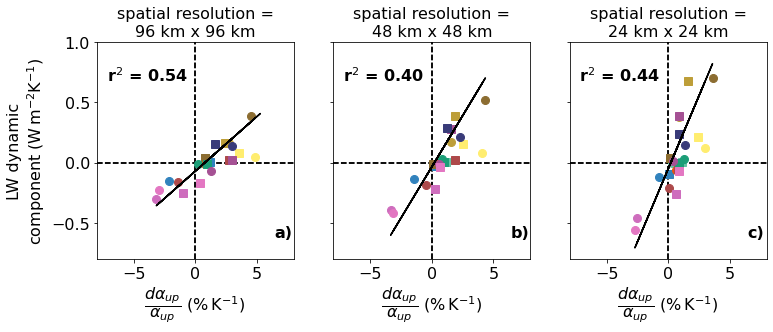

In [13]:
deltaT = 5
ms = 8
resolutions= ['32', '16', '8']
resolutions_km = ['96', '48', '24']
markers = ['o', 's', 'd']
fig1, axes1 = plt.subplots(1,3)
fxlim= [-8, 8]#[-7, 15]
ylim = [-0.8, 1]

lets = ['a)', 'b)', 'c)']
dyn_res = np.empty((3,2,m))*np.nan
res_count = 0
for resolution in resolutions:
    print('res = ', resolution)
    c = 0
    dyns, fups = [],[]
    for k in range(m):
        model = models[k]
        #print(model)
        dp = '/home/users/arm33/RCEMIP/allMod/resolution_npys/'    

        for j in [0,1]: # loop over two temp changes
            lwcrf1 = np.load(dp +  model + '_' + resolution + '_lwcrf_25days.npy', allow_pickle = True)[j,]
            wa5001 = np.load(dp +  model + '_' + resolution + '_wa500_3D_25days.npy', allow_pickle = True)[j,]
            lwcrf2 = np.load(dp +  model + '_' + resolution + '_lwcrf_25days.npy', allow_pickle = True)[j+1,]
            wa5002 = np.load(dp +  model + '_' + resolution + '_wa500_3D_25days.npy', allow_pickle = True)[j+1,]

                
            if model == 'MESONH' or model == 'SCALE' or model =='WRF_COL_CRM':
                lwcrf1 = -lwcrf1


            dig1 = np.digitize(wa5001, bins)
            A1 = funcs.createA(dig1, b)
            LW1 = funcs.createR(lwcrf1, dig1, b)
            LW1 = funcs.rpTrailingZeros(A1, LW1)

            dig2 = np.digitize(wa5002, bins)
            A2 = funcs.createA(dig2, b)
            LW2 = funcs.createR(lwcrf2, dig2, b)
            LW2 = funcs.rpTrailingZeros(A2, LW2)

            totLW,th,LWdyn,nl = funcs.decompose(A1, A2, LW1, LW2, deltaT)    

            #control aggregate index
            Cfup = funcs.calcFup(wa5001)

            #new agg index
            Nfup = funcs.calcFup(wa5002)

            df = funcs.fracChange(Nfup, Cfup, deltaT)

            fups = np.append(fups, df)
            dyns = np.append(dyns,LWdyn)
            dyn_res[res_count,j,k] = LWdyn
            #fup
            ax = axes1[res_count]
            if k==0:
                ax.plot([0,0],ylim, 'k--')
                ax.plot(fxlim, [0,0], 'k--')
            ax.plot(df,LWdyn,  color = cols[k], marker= markers[j], markersize = ms)
            ax.set_xlabel('$\dfrac{d\\alpha_{up}}{\\alpha_{up}}$ (%$\,$K$^{-1}$) ')
            ax.set_ylim(ylim)
            ax.set_xlim(fxlim)

            
        c+=1
    
    print(np.shape(fups), np.shape(dyns))  
    r2 = funcs.addr2line(fups,dyns,axes1[res_count], position = [0.05, 0.85] )
    axes1[res_count].text(0.9, 0.1, lets[res_count], fontweight = 'bold',transform=axes1[res_count].transAxes)
    axes1[res_count].set_title('spatial resolution =\n' + resolutions_km[res_count] + ' km x '+ resolutions_km[res_count] + ' km', fontsize = 16)
    res_count+=1 


axes1[0].set_ylabel('LW dynamic\ncomponent (W$\,$m$^{-2}$K$^{-1}$)')

fig1.set_size_inches(12,4)
plt.subplots_adjust(wspace = 0.2)
plt.setp(axes1[1:], yticklabels = [''])
fig1.savefig('revised_plots/FigS3.pdf', bbox_inches= 'tight')



## Test dynamic effect vs ascent fraction at different temporal resolutions

res =  24


/home/users/arm33/RCEMIP/allMod/../funcs.py:120: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


(24,) (24,)
slope is:  0.09003199994446975  and standard error is: 0.017715102063715932
res =  12
(24,) (24,)
slope is:  0.10861984584687262  and standard error is: 0.025739759627634296
res =  6
(24,) (24,)
slope is:  0.1427178992611053  and standard error is: 0.0353388227884322


/tmp/ipykernel_535/3743363761.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes1[1:], yticklabels = [''])


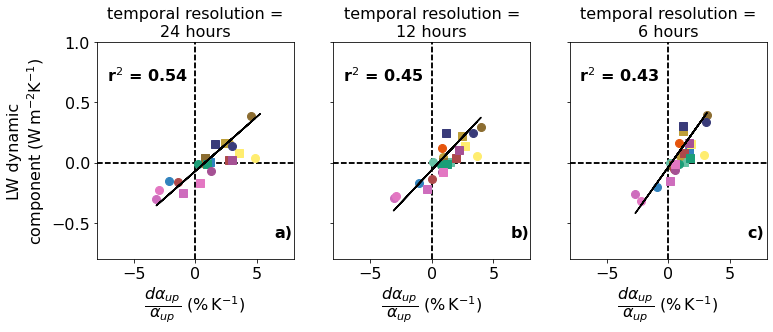

In [14]:
deltaT = 5
ms = 8
resolutions= ['24', '12', '6']
markers = ['o', 's', 'd']
fig1, axes1 = plt.subplots(1,3)
#fxlim= [-8, 8]#[-7, 15]
#ylim = [-0.8, 0.8]

lets = ['a)', 'b)', 'c)']
dyn_res = np.empty((3,2,m))*np.nan
res_count = 0
for resolution in resolutions:
    print('res = ', resolution)
    c = 0
    dyns, fups = [],[]
    for k in range(m):
        model = models[k]
        
        dp = '/home/users/arm33/RCEMIP/allMod/time_resolution_npys/'    

        for j in [0,1]: # loop over two temp changes
            lwcrf1 = np.load(dp +  model + '_32_lwcrf_'+ resolution + 'hours.npy', allow_pickle = True)[j,]
            wa5001 = np.load(dp +  model + '_32_wa500_3D_'+ resolution + 'hours.npy', allow_pickle = True)[j,]
            lwcrf2 = np.load(dp +  model + '_32_lwcrf_'+ resolution + 'hours.npy', allow_pickle = True)[j+1,]
            wa5002 = np.load(dp +  model + '_32_wa500_3D_'+ resolution + 'hours.npy', allow_pickle = True)[j+1,]
            
            if model =='WRF_COL_CRM':
                lwcrf1 = -lwcrf1


            dig1 = np.digitize(wa5001, bins)
            A1 = funcs.createA(dig1, b)
            LW1 = funcs.createR(lwcrf1, dig1, b)
            LW1 = funcs.rpTrailingZeros(A1, LW1)

            dig2 = np.digitize(wa5002, bins)
            A2 = funcs.createA(dig2, b)
            LW2 = funcs.createR(lwcrf2, dig2, b)
            LW2 = funcs.rpTrailingZeros(A2, LW2)

            totLW,th,LWdyn,nl = funcs.decompose(A1, A2, LW1, LW2, deltaT)    

            #control aggregate index
            Cfup = funcs.calcFup(wa5001)

            #new agg index
            Nfup = funcs.calcFup(wa5002)

            df = funcs.fracChange(Nfup, Cfup, deltaT)

            fups = np.append(fups, df)
            dyns = np.append(dyns,LWdyn)
            dyn_res[res_count,j,k] = LWdyn
            #fup
            ax = axes1[res_count]
            if k==0:
                ax.plot([0,0],ylim, 'k--')
                ax.plot(fxlim, [0,0], 'k--')
            ax.plot(df,LWdyn,  color = cols[k], marker= markers[j], markersize = ms)
            ax.set_xlabel('$\dfrac{d\\alpha_{up}}{\\alpha_{up}}$ (%$\,$K$^{-1}$) ')
            ax.set_ylim(ylim)
            ax.set_xlim(fxlim)

            
        c+=1
    
    print(np.shape(fups), np.shape(dyns))  
    r2 = funcs.addr2line(fups,dyns,axes1[res_count], position = [0.05, 0.85] )
    axes1[res_count].text(0.9, 0.1, lets[res_count], fontweight = 'bold',transform=axes1[res_count].transAxes)
    axes1[res_count].set_title('temporal resolution =\n' + resolution + ' hours', fontsize = 16)
    res_count+=1 


axes1[0].set_ylabel('LW dynamic\ncomponent (W$\,$m$^{-2}$K$^{-1}$)')

fig1.set_size_inches(12,4)
plt.subplots_adjust(wspace = 0.2)
plt.setp(axes1[1:], yticklabels = [''])
fig1.savefig('revised_plots/FigS4.pdf', bbox_inches= 'tight')



In [6]:
#sanity check that the 24 hour resolution is the same as the other analysis

for model in models:
    print(model)
    tempIn = 'large305'
    print('resolution_npys/'+ model + '_32_lwcrf_25days.npy')
    lwcrf_new = np.load('time_resolution_npys/'+ model + '_32_lwcrf_24hours.npy', allow_pickle = True)    
    print(lwcrf_new[2,:,0,1])
     
    
    dp2 = '/home/users/arm33/RCEMIP/'+ model +'/processed_new/2D/'
    main = np.load(dp2 + tempIn + 'lwcrf24hrs.npy', allow_pickle = True)
    print(main[:,0,1])

CM1
resolution_npys/CM1_32_lwcrf_25days.npy
[ 1.34963421  1.91753637 22.34132996  6.53590563  0.95499534 52.05502923
  3.30065516  1.98491767  4.09035523 27.34829173 11.49891467 37.15380927
  5.68396841  7.12631233 42.55312232  4.11435399  1.30962544 46.08769701
  2.18672491  0.41033229  0.50426468 16.8067244   5.21639843 37.07342902
 62.27575815]
[ 1.34963421  1.91753637 22.34132996  6.53590563  0.95499534 52.05502923
  3.30065516  1.98491767  4.09035523 27.34829173 11.49891467 37.15380927
  5.68396841  7.12631233 42.55312232  4.11435399  1.30962544 46.08769701
  2.18672491  0.41033229  0.50426468 16.8067244   5.21639843 37.07342902
 62.27575815]
dam
resolution_npys/dam_32_lwcrf_25days.npy
[1.72851883e+01 7.24817021e-01 3.07471210e+01 5.30960666e+01
 2.89852449e+01 1.36856669e+01 6.75988975e+01 5.14797724e+00
 1.84343212e+00 5.67794770e+00 8.97323297e-01 1.29570139e-01
 2.79102884e-03 1.30448574e+01 1.25443684e+01 3.30133713e-03
 1.43591633e-01 2.48572563e+01 1.28726087e+00 6.97587455

## 